In [44]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib as plt
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


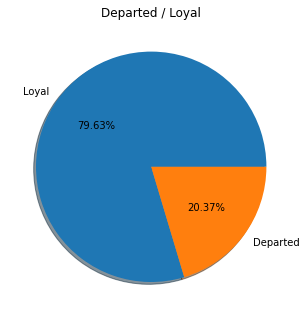

In [230]:
# 9.1
import pandas as pd
import matplotlib.pyplot as plt

churn_data = pd.read_csv('data/churn.csv')
churn_data =  churn_data.replace({'Exited':{1:'Departed',0:'Loyal'}})
temp=churn_data['Exited'].value_counts()

fig=plt.figure(figsize=(4,4))

axes = fig.add_axes([0,0,1,1])
plt.title('Departed / Loyal')
axes.pie(temp,labels=temp.index,autopct='%.2f%%',explode=[0,0],shadow=True);



In [ ]:
# 9.2
import pandas as pd
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
temp = churn_data[churn_data['Balance'] > 2500]
#temp = churn_data[churn_data['Balance'] < 50000]
temp=temp['Balance']


fig = px.line(
    data_frame=temp,
    y='Balance',
#    x="RowNumber",
#    orientation='v',
    height=500,
    width=1400,
#    color='Balance',
    title='Member / Balance')
fig.show()
temp.mean()

In [ ]:
#9.3
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
display(churn_data.head(8))

line_data = churn_data .groupby('Exited', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()


In [ ]:
# 9.3
import pandas as pd

import matplotlib as plt
import matplotlib.pyplot as plt

churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data[['RowNumber','Exited','Balance']]

churn_data_0 = churn_data[(churn_data['Balance'] > 2500) & (churn_data['Exited']==0)]
churn_data_1 = churn_data[(churn_data['Balance'] > 2500) & (churn_data['Exited']==1)]
churn_data_01 = churn_data_0.join(churn_data_1,how='outer',lsuffix='_0',rsuffix='_1')
churn_data_01 = churn_data_01[['Balance_0','Balance_1']]

display(churn_data_0.head())
display(churn_data_1.head())
display(churn_data_01.head())

#churn_data_01.plot(kind='line',figsize=(25,5),grid=True,lw=1);    # Рабочий

#a = ['Loyal','Departed']
#b = [churn_data_01['Balance_0'].sum(),churn_data_01['Balance_1'].sum()]
#plt.bar(a,b)
#plt.show()                                                                        # Рабочий


plt.plot(churn_data_0['RowNumber'],churn_data_0['Balance'])




,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Female    1139
Male       898
Name: Gender, dtype: int64

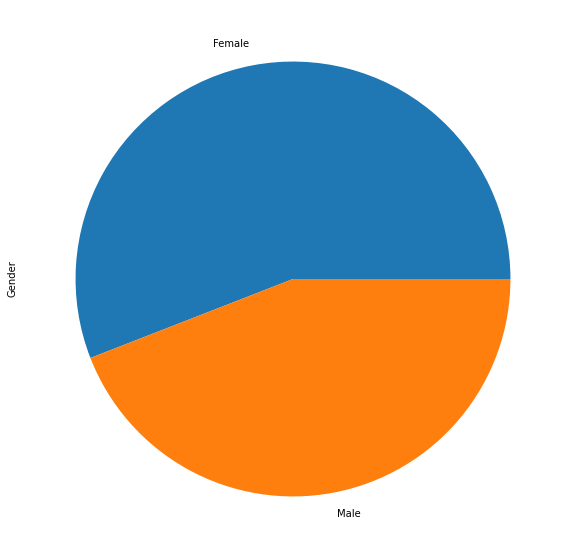

In [238]:
# 9.6
import pandas as pd

import plotly
import plotly.express as px
import matplotlib as plt
import matplotlib.pyplot as plt

churn_data = pd.read_csv('data/churn.csv')

display(churn_data)

churn_data_out = churn_data[churn_data['Exited']==1]
#churn_data = churn_data[['Gender']]
churn_data_out['Gender'].value_counts()
churn_data_out_gender = churn_data_out['Gender'].value_counts()
churn_data_out_gender.plot(kind='pie',figsize=(10,10))
churn_data_out_gender